In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
import seaborn as sns
sns.set()

import phenalyze as ph

from sklearn.metrics import r2_score

# Lectura de datos

In [2]:
k_r_list = np.linspace(1,3,10)
h_list = np.linspace(1,4,10)
b_list = np.linspace(1,3,10)

In [3]:
datalist = []

for h_i in h_list:
    for k_r in k_r_list:
        for b_i in b_list:
            df = pd.read_csv(f"Data_RangoParcial/Activadores/RuidoIntrinseco/ActInt_h{h_i:.1f}_kr{k_r:.1f}_b{b_i:.1f}.csv", header=0, index_col=0)
            df.insert(0, "h", [h_i, h_i])
            df.insert(1, "kr", [k_r, k_r])
            df.insert(2, "Beta", [b_i, b_i])
            datalist.append(df)

TresAct_IntData = pd.concat(datalist)
TresAct_IntData.columns = ['h', 'kr', 'Beta', 'RNA 1', 'Protein 1', 'RNA 2', 'Protein 2', 'RNA 3', 'Protein 3']
# display(TresAct_IntData)

In [4]:
TresAct_int = TresAct_IntData.loc["CV2"]
display(TresAct_int)
# DosAct_int = TresAct_int.loc[TresAct_int.Beta==b_list[6]][['h', 'kr', 'RNA 1', 'Protein 1', 'RNA 2', 'Protein 2']]

,h,kr,Beta,RNA 1,Protein 1,RNA 2,Protein 2,RNA 3,Protein 3
CV2,1.0,1.0,1.000000,0.229451,0.031389,0.541544,0.078467,0.415254,0.076069
CV2,1.0,1.0,1.222222,0.229475,0.031630,0.444610,0.065407,0.352022,0.061942
CV2,1.0,1.0,1.444444,0.228442,0.031355,0.377681,0.055420,0.311656,0.053517
CV2,1.0,1.0,1.666667,0.229216,0.031549,0.327674,0.049621,0.279409,0.046954
CV2,1.0,1.0,1.888889,0.229007,0.031269,0.291381,0.044016,0.256201,0.042310
...,...,...,...,...,...,...,...,...,...
CV2,4.0,3.0,2.111111,0.076198,0.010440,0.113042,0.015684,0.114963,0.018417
CV2,4.0,3.0,2.333333,0.076418,0.010494,0.102389,0.014120,0.106149,0.015829
CV2,4.0,3.0,2.555556,0.076334,0.010447,0.093780,0.012994,0.101189,0.014363
CV2,4.0,3.0,2.777778,0.076131,0.010371,0.085950,0.011851,0.098323,0.013825


In [5]:
exp_act1 = TresAct_int["Protein 1"].to_numpy().reshape(10,10,10)
exp_act2 = TresAct_int["Protein 2"].to_numpy().reshape(10,10,10)
exp_act3 = TresAct_int["Protein 3"].to_numpy().reshape(10,10,10)

exp_act_p1 = TresAct_IntData.loc["Mean"]["Protein 1"].to_numpy().reshape(10,10,10)
exp_act_p2 = TresAct_IntData.loc["Mean"]["Protein 2"].to_numpy().reshape(10,10,10)
exp_act_p3 = TresAct_IntData.loc["Mean"]["Protein 3"].to_numpy().reshape(10,10,10)

In [6]:
datalist = []

for h_i in h_list:
    for k_r in k_r_list:
        for b_i in b_list:
            df = pd.read_csv(f"Data_RangoParcial/Represores/RuidoIntrinseco/h{h_i:.1f}_kr{k_r:.1f}_b{b_i:.1f}.csv", header=0, index_col=0)
            df.insert(0, "h", [h_i, h_i])
            df.insert(1, "kr", [k_r, k_r])
            df.insert(2, "Beta", [b_i, b_i])
            datalist.append(df)

TresRep_IntData = pd.concat(datalist)
TresRep_IntData.columns = ['h', 'kr', 'Beta', 'RNA 1', 'Protein 1', 'RNA 2', 'Protein 2', 'RNA 3', 'Protein 3']
# display(TresRep_IntData)

In [7]:
TresRep_int = TresRep_IntData.loc["CV2"]
display(TresAct_int)

# DosRep_int = TresRep_int.loc[TresRep_int.Beta==b_list[6]][['h', 'kr', 'RNA 1', 'Protein 1', 'RNA 2', 'Protein 2']]

,h,kr,Beta,RNA 1,Protein 1,RNA 2,Protein 2,RNA 3,Protein 3
CV2,1.0,1.0,1.000000,0.229451,0.031389,0.541544,0.078467,0.415254,0.076069
CV2,1.0,1.0,1.222222,0.229475,0.031630,0.444610,0.065407,0.352022,0.061942
CV2,1.0,1.0,1.444444,0.228442,0.031355,0.377681,0.055420,0.311656,0.053517
CV2,1.0,1.0,1.666667,0.229216,0.031549,0.327674,0.049621,0.279409,0.046954
CV2,1.0,1.0,1.888889,0.229007,0.031269,0.291381,0.044016,0.256201,0.042310
...,...,...,...,...,...,...,...,...,...
CV2,4.0,3.0,2.111111,0.076198,0.010440,0.113042,0.015684,0.114963,0.018417
CV2,4.0,3.0,2.333333,0.076418,0.010494,0.102389,0.014120,0.106149,0.015829
CV2,4.0,3.0,2.555556,0.076334,0.010447,0.093780,0.012994,0.101189,0.014363
CV2,4.0,3.0,2.777778,0.076131,0.010371,0.085950,0.011851,0.098323,0.013825


In [8]:
exp_rep1 = TresRep_int["Protein 1"].to_numpy().reshape(10,10,10)
exp_rep2 = TresRep_int["Protein 2"].to_numpy().reshape(10,10,10)
exp_rep3 = TresRep_int["Protein 3"].to_numpy().reshape(10,10,10)

exp_rep_p1 = TresRep_IntData.loc["Mean"]["Protein 1"].to_numpy().reshape(10,10,10)
exp_rep_p2 = TresRep_IntData.loc["Mean"]["Protein 2"].to_numpy().reshape(10,10,10)
exp_rep_p3 = TresRep_IntData.loc["Mean"]["Protein 3"].to_numpy().reshape(10,10,10)

# Computar modelo analítico

In [9]:
def compute_ss(tt_params:list):
    kr, γr, kp, γp = tt_params
    r_ss = kr/γr
    p_ss = r_ss*kp/γp
    return  r_ss, p_ss

def η_int(tt_params:list):
    kr, γr, kp, γp = tt_params
    r_ss, p_ss = compute_ss(tt_params)
    return (1/p_ss) + (1/r_ss)*(γp/(γr+γp))

def repressor(p, α, β, k, h):
    return α + β * (k**h / (k**h + p**h))

def activator(p, α, β, k, h):
    return α + β * (p**h / (k**h + p**h))

def f_ss(conection:str, tt_params:list, hill_params:list):
    kr, γr, kp, γp = tt_params
    α, β, k, h = hill_params
    r_ss, p_ss = compute_ss(tt_params)

    if conection.lower()=="activador" or conection.lower()=="activator":
        return activator(p_ss, α, β, k, h)
    elif conection.lower()=="represor" or conection.lower()=="repressor":
        return repressor(p_ss, α, β, k, h)
    else:
        print(f"Qué mondá es un f{conection}")
    

def compute_H_repressor(tt_params:list, hill_params:list):
    kr, γr, kp, γp = tt_params
    α, β, k, h = hill_params
    r_ss, p_ss = compute_ss(tt_params)
    return (h*(k**h)*(p_ss**h)*β) / (((k**h)+(p_ss**h)) * ((α*(p_ss**h))+((k**h)*(α+β))))

def compute_H_activator(tt_params:list, hill_params:list):
    kr, γr, kp, γp = tt_params
    α, β, k, h = hill_params
    r_ss, p_ss = compute_ss(tt_params)
    return -(h*(k**h)*(p_ss**h)*β) / (((k**h)+(p_ss**h)) * ((α*(k**h))+((p_ss**h)*(α+β))))

In [10]:
def η_1int(conection:str, tt_params_1:list):
    η1_int = η_int(tt_params_1)
    return η1_int

def η_2int(conection:str, tt_params_1:list, hill_params_12:list, tt_params_2:list):
    η1_int = η_int(tt_params_1)
    η2_int = η_int(tt_params_2)

    if conection.lower()=="activador" or conection.lower()=="activator":
        H21 = compute_H_activator(tt_params_1, hill_params_12)
    elif conection.lower()=="represor" or conection.lower()=="repressor":
        H21 = compute_H_repressor(tt_params_1, hill_params_12)
    else:
        print(f"Qué mondá es un f{conection}")

    return η2_int + (1/2)*(H21**2)*η1_int   

def η_3int(conection:str, tt_params_1:list, hill_params_12:list, tt_params_2:list, hill_params_23:list, tt_params_3:list):
    η1_int = η_int(tt_params_1)
    η2_int = η_int(tt_params_2)
    η3_int = η_int(tt_params_3)

    if conection.lower()=="activador" or conection.lower()=="activator":
        H21 = compute_H_activator(tt_params_1, hill_params_12)
        H32 = compute_H_activator(tt_params_2, hill_params_23)
    elif conection.lower()=="represor" or conection.lower()=="repressor":
        H21 = compute_H_repressor(tt_params_1, hill_params_12)
        H32 = compute_H_repressor(tt_params_2, hill_params_23)
    else:
        print(f"Qué mondá es un f{conection}")

    return η3_int + (1/2)*(H32**2)*η2_int + (3/8)*(H32**2)*(H21**2)*η1_int

In [11]:
"HILL PARAMS"
α = 0.0
β = b_list[6]
k = (1E3 + 1E4)/2
# β_i = (2 + 3)/2
# h_i = 2.0

"TRANSCRIPTION PARAMS"
γ_r = (1/8 + 1/3)/2
k_p = (10 + 60)/2
γ_p = (1/60 + 1/18)/2
# k_r = (1 + 2)/2

In [12]:
h_var = TresAct_int["h"]["CV2"].to_numpy().reshape(10,10,10)
kr_var = TresAct_int["kr"]["CV2"].to_numpy().reshape(10,10,10)
β_var = TresAct_int["Beta"]["CV2"].to_numpy().reshape(10,10,10)


tt_params_1 = [kr_var, γ_r, k_p, γ_p]
hill_params_12 = [α, β_var, k, h_var]
k_r2 = f_ss("Activator", tt_params_1, hill_params_12)
tt_params_2 = [k_r2, γ_r, k_p, γ_p]
hill_params_23 = [α, β, k, h_var]
k_r3 = f_ss("Activator", tt_params_2, hill_params_23)
tt_params_3 = [k_r3, γ_r, k_p, γ_p]

calc_act1 = η_1int("Activator", tt_params_1)
calc_act2 = η_2int("Activator", tt_params_1, hill_params_12, tt_params_2)
calc_act3 = η_3int("Activator", tt_params_1, hill_params_12, tt_params_2, hill_params_23, tt_params_3)
calc_act_p1 = compute_ss(tt_params_1)[1]
calc_act_p2 = compute_ss(tt_params_2)[1]
calc_act_p3 = compute_ss(tt_params_3)[1]


tt_params_1 = [kr_var, γ_r, k_p, γ_p]
hill_params_12 = [α, β_var, k, h_var]
k_r2 = f_ss("Repressor", tt_params_1, hill_params_12)
tt_params_2 = [k_r2, γ_r, k_p, γ_p]
hill_params_23 = [α, β, k, h_var]
k_r3 = f_ss("Repressor", tt_params_2, hill_params_23)
tt_params_3 = [k_r3, γ_r, k_p, γ_p]

calc_rep1 = η_1int("Repressor", tt_params_1)
calc_rep2 = η_2int("Repressor", tt_params_1, hill_params_12,  tt_params_2)
calc_rep3 = η_3int("Repressor", tt_params_1, hill_params_12, tt_params_2, hill_params_23, tt_params_3)
calc_rep_p1 = compute_ss(tt_params_1)[1]
calc_rep_p2 = compute_ss(tt_params_2)[1]
calc_rep_p3 = compute_ss(tt_params_3)[1]

# $R^2$ resultante 

In [13]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [14]:
R2Tensor = np.load("R2_Activators.npz")
R2DosAct = R2Tensor["DosInt"]
R2TresAct = R2Tensor["TresInt"]
R2Tensor = np.load("R2_Repressors.npz")
R2DosRep = R2Tensor["DosInt"]
R2TresRep = R2Tensor["TresInt"]

## Activadores

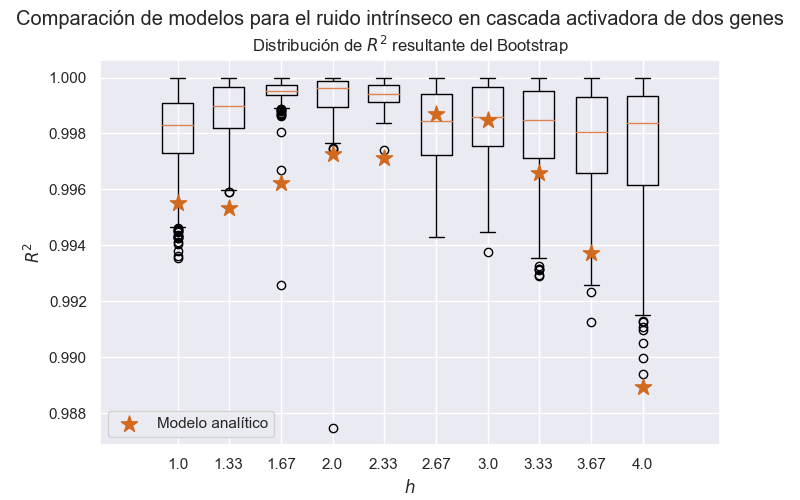

In [15]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
_ = ax.boxplot(np.array(R2DosAct).T, positions=h_list.round(2), widths=0.2)#, label="Modelo fenomenológico")
for i in range(9):
    ax.scatter(h_list[i], r2_score(exp_act2[i,:,6],calc_act2[i,:,6]), c="chocolate", zorder=100, marker="*", s=150)
ax.scatter(h_list[-1], r2_score(exp_act2[-1,:,6],calc_act2[-1,:,6]), c="chocolate", zorder=100, marker="*", s=150, label="Modelo analítico")
ax.set_ylabel(r"$R^2$")
ax.set_xlabel(r"$h$")
ax.set_title(r"Distribución de $R^2$ resultante del Bootstrap")
plt.legend()
plt.suptitle("Comparación de modelos para el ruido intrínseco en cascada activadora de dos genes")
plt.savefig("GraficasParaGuardar/Rsquared/act2int.png", dpi=1000)

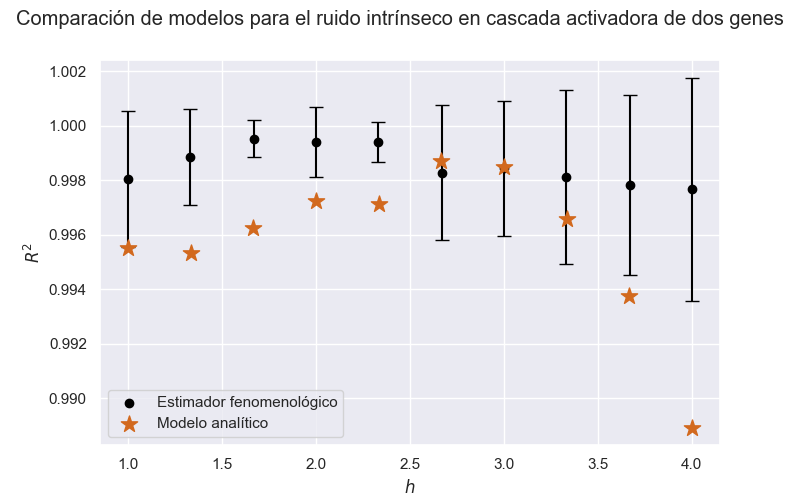

In [16]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
_ = ax.scatter(h_list.round(2), np.mean(R2DosAct, axis=1), label="Estimador fenomenológico", c="black")#, widths=0.2)#, label="Modelo fenomenológico")
_ = ax.errorbar(h_list.round(2), np.mean(R2DosAct, axis=1), 1.96*np.std(R2DosAct, axis=1), capsize=5, ls='none', c="black")
for i in range(9):
    ax.scatter(h_list[i], r2_score(exp_act2[i,:,6],calc_act2[i,:,6]), c="chocolate", zorder=100, marker="*", s=150)
ax.scatter(h_list[-1], r2_score(exp_act2[-1,:,6],calc_act2[-1,:,6]), c="chocolate", zorder=100, marker="*", s=150, label="Modelo analítico")
ax.set_ylabel(r"$R^2$")
ax.set_xlabel(r"$h$")
# ax.set_title(r"Distribución de $R^2$ resultante del Bootstrap")
plt.legend()
plt.suptitle("Comparación de modelos para el ruido intrínseco en cascada activadora de dos genes")
plt.savefig("GraficasParaGuardar/Rsquared/act2int.png", dpi=1000)

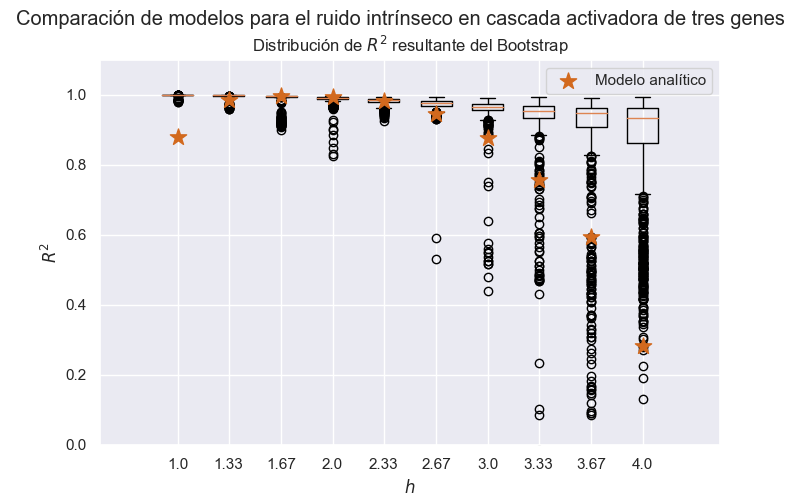

In [17]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
_ = ax.boxplot(np.array(R2TresAct).T, positions=h_list.round(2), widths=0.2)#, label="Modelo fenomenológico")
for i in range(9):
    ax.scatter(h_list[i], r2_score(exp_act3[i,:,:],calc_act3[i,:,:]), c="chocolate", zorder=100, marker="*", s=150)
ax.scatter(h_list[-1], r2_score(exp_act3[-1,:,:],calc_act3[-1,:,:]), c="chocolate", zorder=100, marker="*", s=150, label="Modelo analítico")
ax.set_ylabel(r"$R^2$")
ax.set_xlabel(r"$h$")
ax.set_title(r"Distribución de $R^2$ resultante del Bootstrap")
plt.legend()
plt.ylim(0,1.1)
plt.suptitle("Comparación de modelos para el ruido intrínseco en cascada activadora de tres genes")
plt.savefig("GraficasParaGuardar/Rsquared/act3int.png", dpi=1000)

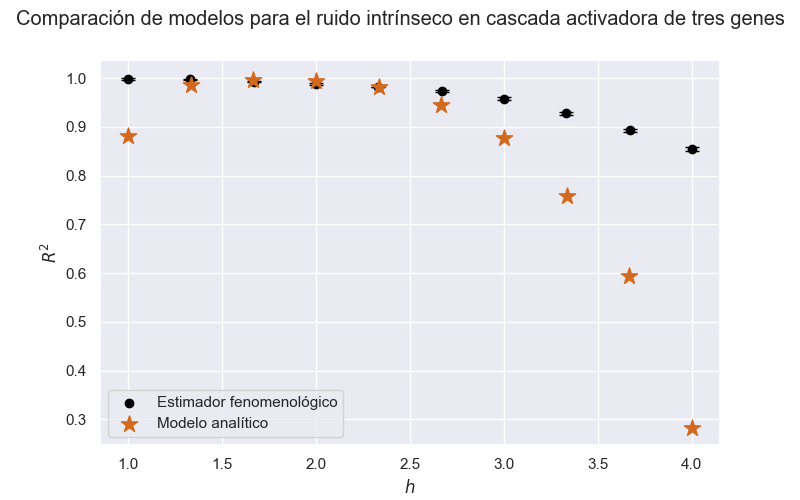

In [18]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
_ = ax.scatter(h_list.round(2), np.mean(R2TresAct, axis=1), label="Estimador fenomenológico", c="black")#, widths=0.2)#, label="Modelo fenomenológico")
_ = ax.errorbar(h_list.round(2), np.mean(R2TresAct, axis=1), 1.96*np.std(R2DosAct, axis=1), capsize=5, ls='none', c="black")
for i in range(9):
    ax.scatter(h_list[i], r2_score(exp_act3[i,:,:],calc_act3[i,:,:]), c="chocolate", zorder=100, marker="*", s=150)
ax.scatter(h_list[-1], r2_score(exp_act3[-1,:,:],calc_act3[-1,:,:]), c="chocolate", zorder=100, marker="*", s=150, label="Modelo analítico")
ax.set_ylabel(r"$R^2$")
ax.set_xlabel(r"$h$")
# ax.set_title(r"Distribución de $R^2$ resultante del Bootstrap")
plt.legend()
plt.suptitle("Comparación de modelos para el ruido intrínseco en cascada activadora de tres genes")
plt.savefig("GraficasParaGuardar/Rsquared/act3int.png", dpi=1000)

## Represores

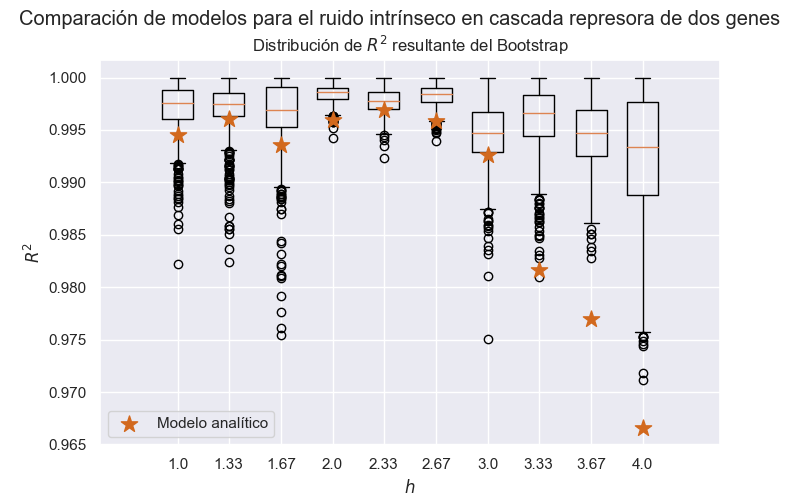

In [19]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
_ = ax.boxplot(np.array(R2DosRep).T, positions=h_list.round(2), widths=0.2)#, label="Modelo fenomenológico")
for i in range(9):
    ax.scatter(h_list[i], r2_score(exp_rep2[i,:,6],calc_rep2[i,:,6]), c="chocolate", zorder=100, marker="*", s=150)
ax.scatter(h_list[-1], r2_score(exp_rep2[-1,:,6],calc_rep2[-1,:,6]), c="chocolate", zorder=100, marker="*", s=150, label="Modelo analítico")
ax.set_ylabel(r"$R^2$")
ax.set_xlabel(r"$h$")
ax.set_title(r"Distribución de $R^2$ resultante del Bootstrap")
plt.legend()
plt.suptitle("Comparación de modelos para el ruido intrínseco en cascada represora de dos genes")
plt.savefig("GraficasParaGuardar/Rsquared/rep2int.png", dpi=1000)

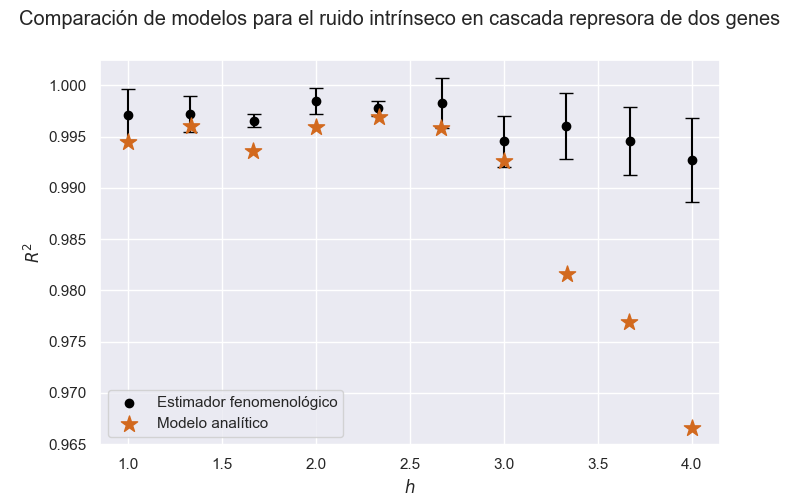

In [20]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
_ = ax.scatter(h_list.round(2), np.mean(R2DosRep, axis=1), label="Estimador fenomenológico", c="black")#, widths=0.2)#, label="Modelo fenomenológico")
_ = ax.errorbar(h_list.round(2), np.mean(R2DosRep, axis=1), 1.96*np.std(R2DosAct, axis=1), capsize=5, ls='none', c="black")
for i in range(9):
    ax.scatter(h_list[i], r2_score(exp_rep2[i,:,6],calc_rep2[i,:,6]), c="chocolate", zorder=100, marker="*", s=150)
ax.scatter(h_list[-1], r2_score(exp_rep2[-1,:,6],calc_rep2[-1,:,6]), c="chocolate", zorder=100, marker="*", s=150, label="Modelo analítico")
ax.set_ylabel(r"$R^2$")
ax.set_xlabel(r"$h$")
# ax.set_title(r"Distribución de $R^2$ resultante del Bootstrap")
plt.legend()
plt.suptitle("Comparación de modelos para el ruido intrínseco en cascada represora de dos genes")
plt.savefig("GraficasParaGuardar/Rsquared/rep2int.png", dpi=1000)

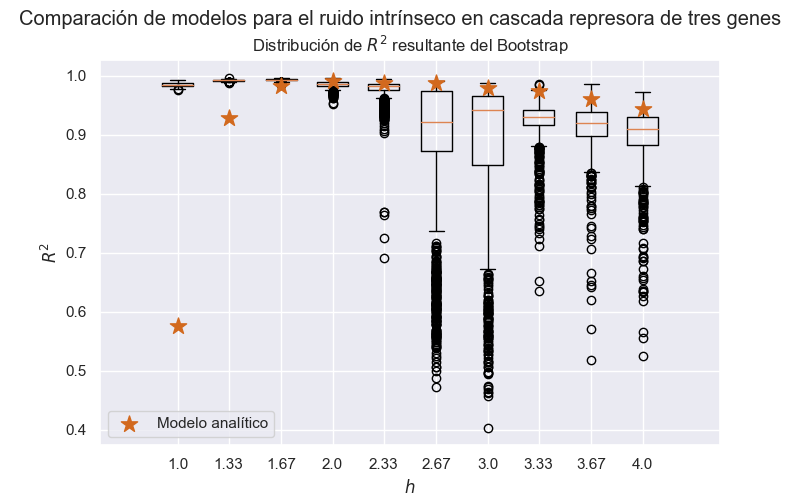

In [21]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
_ = ax.boxplot(np.array(R2TresRep).T, positions=h_list.round(2), widths=0.2)#, label="Modelo fenomenológico")
for i in range(9):
    ax.scatter(h_list[i], r2_score(exp_rep3[i,:,:],calc_rep3[i,:,:]), c="chocolate", zorder=100, marker="*", s=150)
ax.scatter(h_list[-1], r2_score(exp_rep3[-1,:,:],calc_rep3[-1,:,:]), c="chocolate", zorder=100, marker="*", s=150, label="Modelo analítico")
ax.set_ylabel(r"$R^2$")
ax.set_xlabel(r"$h$")
ax.set_title(r"Distribución de $R^2$ resultante del Bootstrap")
plt.legend()
plt.suptitle("Comparación de modelos para el ruido intrínseco en cascada represora de tres genes")
plt.savefig("GraficasParaGuardar/Rsquared/rep3int.png", dpi=1000)

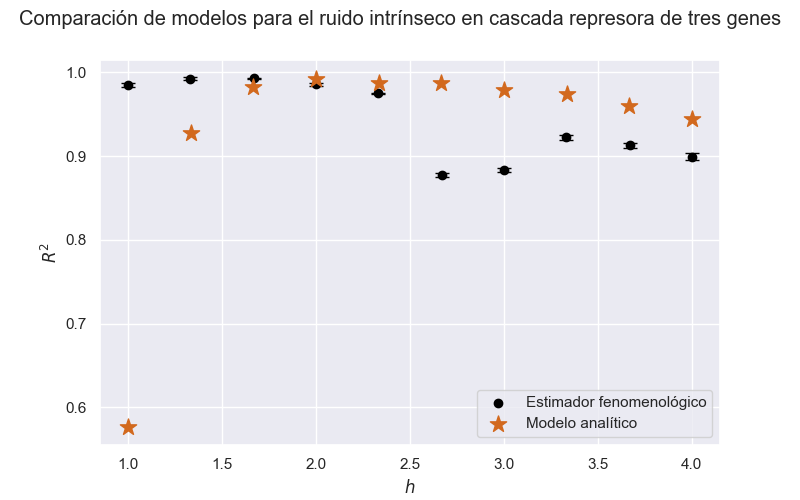

In [22]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
_ = ax.scatter(h_list.round(2), np.mean(R2TresRep, axis=1), label="Estimador fenomenológico", c="black")#, widths=0.2)#, label="Modelo fenomenológico")
_ = ax.errorbar(h_list.round(2), np.mean(R2TresRep, axis=1), 1.96*np.std(R2DosAct, axis=1), capsize=5, ls='none', c="black")
for i in range(9):
    ax.scatter(h_list[i], r2_score(exp_rep3[i,:,:],calc_rep3[i,:,:]), c="chocolate", zorder=100, marker="*", s=150)
ax.scatter(h_list[-1], r2_score(exp_rep3[-1,:,:],calc_rep3[-1,:,:]), c="chocolate", zorder=100, marker="*", s=150, label="Modelo analítico")
ax.set_ylabel(r"$R^2$")
ax.set_xlabel(r"$h$")
# ax.set_title(r"Distribución de $R^2$ resultante del Bootstrap")
plt.legend()
plt.suptitle("Comparación de modelos para el ruido intrínseco en cascada represora de tres genes")
plt.savefig("GraficasParaGuardar/Rsquared/rep3int.png", dpi=1000)